<a href="https://colab.research.google.com/github/anath703/DS_5100_PROJECT/blob/main/Home_Field_Advantage_Analysis_Group_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home-Field Advantage in the NFL Analysis
Cepehr Alizadeh (ca3eh)

Seth Harrison (wdv7nu)

Marin Llolic (ejz2sg)

Anoop Nath (nux9aq)

First, we created a web scraper that scraped the Pro Football Reference game-logs of each NFL dating back to 1970. This data set served as the main data source for our project. In this notebook, the scraper has been commented out to reduce the run-time and pulls the scraped data directly from our Github page.

In [1]:
# from urllib.request import urlopen as uReq
# from bs4 import BeautifulSoup as bs
# import csv
# import pandas as pd

# headerAdded = False

# for yr in range(1970,2021):
#     myurl = f'https://www.pro-football-reference.com/years/{yr}/games.htm'
#     # grab website 
#     uClient = uReq(myurl)
    

#     # read / close HTML
#     page_html = uClient.read()
#     uClient.close()
     
#     # getting BeautifulSoup 
#     soup= bs(page_html, "html.parser")
#     #print(page_soup.prettify())
    
#     #Week column
#     weeksList=[]

#     weeks = soup.findAll(
#        "th", {"data-stat": "week_num"})
#     for tag in weeks:
#         txt= tag.text;
#         weeksList.append(txt) 
#     weeksList= [val for val in weeksList if val != 'Week' ]    
# #    weeksist = datesList[1:]#dropping the first index because it's accidently pulling in the header

# #   Day Column 
#     dayList=[]
#     day = soup.findAll(
#        "td", {"data-stat": "game_day_of_week"})
#     for tag in day:
#         txt= tag.text;
#         dayList.append(txt) 
    
#     #Getting "Date" column
#     datesList=[]
#     dates = soup.findAll(
#        "td", {"data-stat": "game_date"})
#     for tag in dates:
#         txt= tag.text;
#         datesList.append(txt) 
#  #   datesList = datesList[1:]#dropping the first index because it's accidently pulling in the header
        
#     #Getting Time column
#     startList=[]
#     startTimes= soup.findAll(
#        "td", {"data-stat": "gametime"})
#     for tag in startTimes:
#         txt= tag.text;
#         startList.append(txt)      
       
#     #Getting "winner/tie"" column
#     winningTeamsList =[]
#     winningNames = soup.findAll(
#        "td", {"data-stat": "winner"})
#     for tag in winningNames:
#         txt= tag.text;
#         winningTeamsList.append(txt)  
        
#     #Getting "@" column
#     locationList =[] 
#     locations= soup.findAll(
#        "td", {"data-stat": "game_location"})
#     for tag in locations:
#         txt= tag.text;
#         locationList.append(txt)   
        
#     #Getting "loser/tie"" column
#     losingTeamsList =[]
#     losingNames = soup.findAll(
#        "td", {"data-stat": "loser"})
#     for tag in losingNames:
#         txt= tag.text;
#         losingTeamsList.append(txt)  

        
#     #Getting "pts/w" column
#     ptsWinnerList =[] 
#     pts= soup.findAll(
#        "td", {"data-stat": "pts_win"})
#     for tag in pts:
#         txt= tag.text;
#         ptsWinnerList.append(txt)      

#     #Getting "pts/l" column
#     ptsLoserList =[] 
#     pts= soup.findAll(
#        "td", {"data-stat": "pts_lose"})
#     for tag in pts:
#         txt= tag.text;
#         ptsLoserList.append(txt)     

#     #Getting "yards_win" column
#     yardsWinList =[] 
#     yardsWin= soup.findAll(
#        "td", {"data-stat": "yards_win"})
#     for tag in yardsWin:
#         txt= tag.text;
#         yardsWinList.append(txt)   
        
#      #Getting "TOW" column
#     winnerTurnoverList =[] 
#     winnerTO= soup.findAll(
#        "td", {"data-stat": "to_win"})
#     for tag in winnerTO:
#         txt= tag.text;
#         winnerTurnoverList.append(txt) 
        
#     #Getting "yards_lose" column
#     yardsLoseList =[] 
#     yardsLose= soup.findAll(
#        "td", {"data-stat": "yards_lose"})
#     for tag in yardsLose:
#         txt= tag.text;
#         yardsLoseList.append(txt)   
        
#   #Getting "TOL" column
#     loserTurnoverList =[] 
#     loserTO= soup.findAll(
#        "td", {"data-stat": "to_lose"})
#     for tag in loserTO:
#         txt= tag.text;
#         loserTurnoverList.append(txt)  

#     header= ['Season', 'Week', 'Day', 'Date', 'Time','Winner/Tie', 'Location', 'Loser/Tie', 'Points_Winner','Points_Loser', 'Yards_Winner', 'Turnover_Winner', 'Yards_Loser','Turnover_Loser' ]
#     with open('nflFullGameLog.csv','a') as file:
#             #writing to csv file
#             writer=csv.writer(file)
#             if not headerAdded:
#                 writer.writerow(header)
#                 headerAdded= True
#             for i in range(len(datesList)):    
#                 myRow= [ yr, weeksList[i], dayList[i], datesList[i],startList[i],winningTeamsList[i],locationList[i],losingTeamsList[i],ptsWinnerList[i],ptsLoserList[i],yardsWinList[i], winnerTurnoverList[i],yardsLoseList[i], loserTurnoverList[i] ]
#                 writer.writerow(myRow)

# df= pd.read_csv('nflGameLog2010.csv') #reading in csv

**Data Cleaning / Data Manipulation**

After scraping our data set, we needed to clean the data to make it usable for our objective. Here's the list of data cleaning tasks that we needed to carry out: 


*   Neutral stadium tagging (merging original data set with neutral game data set)
*   Home Team indication and associated yards, points, and turnovers
*   Away Team indication and associated yards, points, and turnovers
*   Calculate points, yards, and turnover differential between home and away teams
*   Remove unneeded or duplicated columns 
*   Remove rows associated with seasons before 2000



In [2]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/anath703/DS_5100_PROJECT/main/data/nflFullGameLog.csv' #location of raw data file
df = pd.read_csv(url)
df2= pd.read_csv('https://github.com/anath703/DS_5100_PROJECT/raw/main/nflFullGameLog_neutral.csv')
df['Neutral'] = df2['Neutral'] 
df['Neutral'] =  np.where(df['Location'] == 'N', True , False) # adding a column that indicates if a game is played in a neutral stadium
df['Away_Team'] = df['Winner/Tie'].where(df['Location'] == '@', df['Loser/Tie'])


df=  df[df['Week'].notna()] #removing rows that have NAs in the "Week" column
df['Date']= pd.to_datetime(df['Date'] ).dt.date #converting to date time

#creating new columns to indicate which team is home, which team is away, and yards,points and turnovers for each.
df['Home_Team'] = df['Loser/Tie'].where(df['Location'] == '@', df['Winner/Tie'])
df['Points_Home'] = df['Points_Loser'].where(df['Location'] == '@', df['Points_Winner'])
df['Yards_Home'] = df['Yards_Loser'].where(df['Location'] == '@', df['Yards_Winner'])
df['Turnover_Home'] = df['Turnover_Loser'].where(df['Location'] == '@', df['Turnover_Winner'])


df['Away_Team'] = df['Winner/Tie'].where(df['Location'] == '@', df['Loser/Tie'])
df['Points_Away'] = df['Points_Winner'].where(df['Location'] == '@', df['Points_Loser'])
df['Yards_Away'] = df['Yards_Winner'].where(df['Location'] == '@', df['Yards_Loser'])
df['Turnover_Away'] = df['Turnover_Winner'].where(df['Location'] == '@', df['Turnover_Loser'])
###

#creating columns to indicate point, yards and turnover differential (Home minus Away)
df['Points_Diff']= df['Points_Home']-df['Points_Away'] 
df['Yards_Diff']= df['Yards_Home']-df['Yards_Away'] 
df['Turnover_Diff']= df['Turnover_Home']-df['Turnover_Away'] 
##

#removing unneeded/duplicate columns
df.drop([ 'Winner/Tie', 'Location','Loser/Tie','Points_Winner', 'Points_Loser', 'Yards_Winner','Turnover_Winner', 'Yards_Loser', 'Turnover_Loser'], inplace=True, axis=1)

#remove seasons before 2000
df = df[(df['Season']>1999)]

df


,Season,Week,Day,Date,Time,Neutral,Away_Team,Home_Team,Points_Home,Yards_Home,Turnover_Home,Points_Away,Yards_Away,Turnover_Away,Points_Diff,Yards_Diff,Turnover_Diff
6698,2000,1,Sun,2000-09-03,1:00PM,False,Chicago Bears,Minnesota Vikings,30.0,374.0,1.0,27.0,425.0,1.0,3.0,-51.0,0.0
6699,2000,1,Sun,2000-09-03,1:00PM,False,Indianapolis Colts,Kansas City Chiefs,14.0,280.0,1.0,27.0,386.0,2.0,-13.0,-106.0,-1.0
6700,2000,1,Sun,2000-09-03,1:01PM,False,Carolina Panthers,Washington Redskins,20.0,396.0,0.0,17.0,236.0,1.0,3.0,160.0,-1.0
6701,2000,1,Sun,2000-09-03,1:02PM,False,San Francisco 49ers,Atlanta Falcons,36.0,359.0,1.0,28.0,339.0,1.0,8.0,20.0,0.0
6702,2000,1,Sun,2000-09-03,1:02PM,False,Baltimore Ravens,Pittsburgh Steelers,0.0,223.0,1.0,16.0,336.0,0.0,-16.0,-113.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12307,2020,Division,Sun,2021-01-17,3:05PM,False,Cleveland Browns,Kansas City Chiefs,22.0,438.0,1.0,17.0,308.0,2.0,5.0,130.0,-1.0
12308,2020,Division,Sun,2021-01-17,6:40PM,False,Tampa Bay Buccaneers,New Orleans Saints,20.0,294.0,4.0,30.0,316.0,0.0,-10.0,-22.0,4.0
12309,2020,ConfChamp,Sun,2021-01-24,3:05PM,False,Tampa Bay Buccaneers,Green Bay Packers,26.0,381.0,2.0,31.0,351.0,3.0,-5.0,30.0,-1.0
12310,2020,ConfChamp,Sun,2021-01-24,6:40PM,False,Buffalo Bills,Kansas City Chiefs,38.0,439.0,1.0,24.0,363.0,1.0,14.0,76.0,0.0


**Merge with Stadium Location Data**

A variable of interest to us was determining if the distance traveled by the away team impacted the point differential between the teams. After some research, we discovered there were no existing data sets that have the data we needed. Therefore, we needed to create the data set of stadiums' coordinates ourselves.

Before researching the coordinates of all NFL stadiums, we needed to research to see how many NFL stadiums have existed since 2000. Many teams have moved stadiums within the same city (Pittsburgh Steelers) and some teams have moved stadiums across cities (St. Louis Rams becoming the Los Angeles Rams). 

Since teams have also changed names (Washington Redskins becoming the Washington Football Team), we needed to create duplicate rows for teams with name changes to ensure their data is utilized correctly across the 20-year period we're analyzing.

To finally find the coordinates (latitude and longitude) of all the NFL stadiums, we utilized https://www.findlatitudeandlongitude.com/ as our search engine. 

We also utilized https://elevation.maplogs.com/ to gather data on the altitude of the NFL stadiums we're researching to see if this could be impactful for analysis down the road. 

Lastly, we also wanted to include stadium type (roof, open-air, retractable roof) to see if this could be a variable of interest down the road. We utilized https://en.wikipedia.org/wiki/List_of_current_National_Football_League_stadiums to gather this info. 

This stadium data set can be found on our [Github.](https://github.com/anath703/DS_5100_PROJECT/blob/main/stadium_coordinates.csv)

Once we had this data set, we needed to merge it with our existing data set from Pro Football Reference. Then, we created a function to calculate the distance (in miles) between the stadiums. 

In [3]:
import geopy.distance

#reading in stadium data
stadium = pd.read_csv('https://raw.githubusercontent.com/anath703/DS_5100_PROJECT/main/data/stadium_coordinates.csv')

#creating a dictionary of the team and then stadium info
stadium_dict = stadium.set_index('team').T.to_dict('list')

#assigning a list of the stadium info to each team based off of team name
df['Home_Stadium_List']= df['Home_Team'].map(stadium_dict)
df['Away_Stadium_List']= df['Away_Team'].map(stadium_dict)

#breaking the list of each team's stadium info into its own column
df[['Home_Latitude','Home_Longitude', 'Home_Stad_Type', 'Home_Altitude']] = pd.DataFrame(df.Home_Stadium_List.tolist(), index= df.index)
df[['Away_Latitude','Away_Longitude', 'Away_Stad_Type', 'Away_Altitude']] = pd.DataFrame(df.Away_Stadium_List.tolist(), index= df.index)

#creating latitude and longitude tuples for distance calculation
df['Home_Tupe'] = list(zip(df.Home_Latitude, df.Home_Longitude))
df['Away_Tupe'] = list(zip(df.Away_Latitude, df.Away_Longitude))

#create a function to calculate the distance in miles between the stadiums
def distance_calc(row):
    coords_1 = (row['Home_Latitude'], row['Home_Longitude'])
    coords_2 = (row['Away_Latitude'], row['Away_Longitude'])
    return geopy.distance.distance(coords_1, coords_2).miles

#apply the function to our dataframe
df['distance'] = df.apply(distance_calc, axis=1)

#remove stadium info lists since they're redundant
df.drop(['Home_Stadium_List','Away_Stadium_List'], inplace=True, axis=1)

df

,Season,Week,Day,Date,Time,Neutral,Away_Team,Home_Team,Points_Home,Yards_Home,Turnover_Home,Points_Away,Yards_Away,Turnover_Away,Points_Diff,Yards_Diff,Turnover_Diff,Home_Latitude,Home_Longitude,Home_Stad_Type,Home_Altitude,Away_Latitude,Away_Longitude,Away_Stad_Type,Away_Altitude,Home_Tupe,Away_Tupe,distance
6698,2000,1,Sun,2000-09-03,1:00PM,False,Chicago Bears,Minnesota Vikings,30.0,374.0,1.0,27.0,425.0,1.0,3.0,-51.0,0.0,44.973881,-93.258094,Fixed,840,41.862306,-87.616672,Open,584,"(44.973881, -93.258094)","(41.862306, -87.616672)",355.853155
6699,2000,1,Sun,2000-09-03,1:00PM,False,Indianapolis Colts,Kansas City Chiefs,14.0,280.0,1.0,27.0,386.0,2.0,-13.0,-106.0,-1.0,39.048914,-94.484039,Open,889,39.760056,-86.163806,Retractable,705,"(39.048914, -94.484039)","(39.760056, -86.16380600000001)",447.822221
6700,2000,1,Sun,2000-09-03,1:01PM,False,Carolina Panthers,Washington Redskins,20.0,396.0,0.0,17.0,236.0,1.0,3.0,160.0,-1.0,38.907697,-76.864517,Open,190,35.225808,-80.852861,Open,715,"(38.907697, -76.864517)","(35.225808, -80.852861)",336.137765
6701,2000,1,Sun,2000-09-03,1:02PM,False,San Francisco 49ers,Atlanta Falcons,36.0,359.0,1.0,28.0,339.0,1.0,8.0,20.0,0.0,33.757614,-84.400972,Retractable,305,37.713486,-122.386256,Open,16,"(33.757614000000004, -84.400972)","(37.713485999999996, -122.386256)",2137.875470
6702,2000,1,Sun,2000-09-03,1:02PM,False,Baltimore Ravens,Pittsburgh Steelers,0.0,223.0,1.0,16.0,336.0,0.0,-16.0,-113.0,1.0,40.446786,-80.015761,Open,732,39.277969,-76.622767,Open,23,"(40.446785999999996, -80.015761)","(39.277969, -76.62276700000001)",197.581711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12307,2020,Division,Sun,2021-01-17,3:05PM,False,Cleveland Browns,Kansas City Chiefs,22.0,438.0,1.0,17.0,308.0,2.0,5.0,130.0,-1.0,39.048914,-94.484039,Open,889,41.506022,-81.699564,Open,581,"(39.048914, -94.484039)","(41.506021999999994, -81.699564)",695.824729
12308,2020,Division,Sun,2021-01-17,6:40PM,False,Tampa Bay Buccaneers,New Orleans Saints,20.0,294.0,4.0,30.0,316.0,0.0,-10.0,-22.0,4.0,29.950931,-90.081364,Fixed,3,27.975967,-82.503350,Open,36,"(29.950931, -90.08136400000001)","(27.975966999999997, -82.50335)",478.590219
12309,2020,ConfChamp,Sun,2021-01-24,3:05PM,False,Tampa Bay Buccaneers,Green Bay Packers,26.0,381.0,2.0,31.0,351.0,3.0,-5.0,30.0,-1.0,44.501306,-88.062167,Open,640,27.975967,-82.503350,Open,36,"(44.501306, -88.062167)","(27.975966999999997, -82.50335)",1180.229763
12310,2020,ConfChamp,Sun,2021-01-24,6:40PM,False,Buffalo Bills,Kansas City Chiefs,38.0,439.0,1.0,24.0,363.0,1.0,14.0,76.0,0.0,39.048914,-94.484039,Open,889,42.773739,-78.786978,Open,849,"(39.048914, -94.484039)","(42.773739, -78.786978)",859.482323


**Data Visualizations**

The next step of our project was to create relevant data visualizations to help us determine what the home-field advantage is, what teams have the greatest home-field advantage historically, and if the home-field advantage has changed historically. 

In this notebook, we will not include our analysis but rather simply the code for our visualizations for the sake of reproducibility. Please go to our Github [page](https://github.com/anath703/DS_5100_PROJECT) to find the associated analysis.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

mean_by_year = df.groupby(['Season']).mean().reset_index()

print(df.dtypes)



Season              int64
Week               object
Day                object
Date               object
Time               object
Neutral              bool
Away_Team          object
Home_Team          object
Points_Home       float64
Yards_Home        float64
Turnover_Home     float64
Points_Away       float64
Yards_Away        float64
Turnover_Away     float64
Points_Diff       float64
Yards_Diff        float64
Turnover_Diff     float64
Home_Latitude     float64
Home_Longitude    float64
Home_Stad_Type     object
Home_Altitude       int64
Away_Latitude     float64
Away_Longitude    float64
Away_Stad_Type     object
Away_Altitude       int64
Home_Tupe          object
Away_Tupe          object
distance          float64
dtype: object


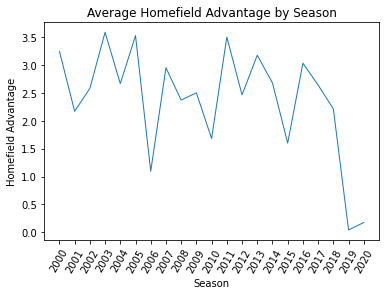

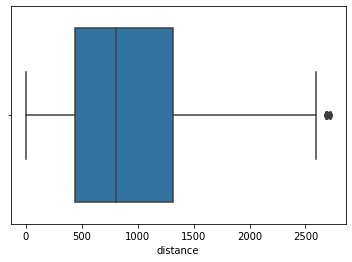

<function matplotlib.pyplot.clf>

In [5]:

#plotting line plot of homefield advantage by season
plt.plot(mean_by_year.Season, mean_by_year.Points_Diff, linewidth=1)
plt.title('Average Homefield Advantage by Season')
plt.xlabel('Season')
plt.ylabel('Homefield Advantage')
plt.xticks(range(2000,2021), rotation =60),
plt.show() #output graph
plt.clf #clear plt

sns.boxplot(x=df['distance']) #boxplot of distance
plt.show()
plt.clf #clear plt


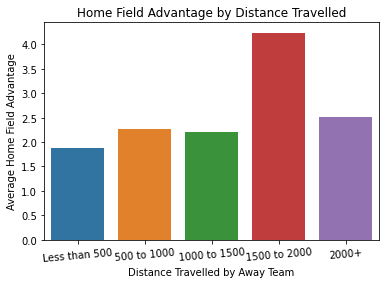

<Figure size 432x288 with 0 Axes>

In [6]:

##Distance Buckets
bins = [0,500, 1000, 1500, 2000,30000]
labels = ['Less than 500','500 to 1000','1000 to 1500', '1500 to 2000', '2000+']
df['Distance_Binned'] = pd.cut(df['distance'], bins=bins, labels= labels)

mean_by_distance = df.groupby(['Distance_Binned']).mean().reset_index()

#bar plot of points diff by distance
barplot= sns.barplot(x = "Distance_Binned", y = "Points_Diff", data = df, ci = None)
barplot.set(xlabel='Distance Travelled by Away Team', ylabel='Average Home Field Advantage', title= 'Home Field Advantage by Distance Travelled')
barplot.set_xticklabels(barplot.get_xticklabels(),rotation =5)
plt.show()
plt.clf()


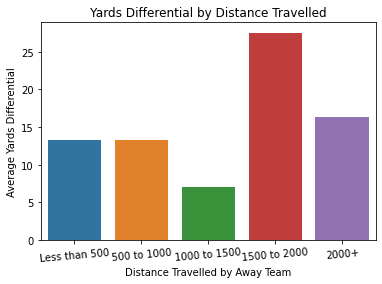

<Figure size 432x288 with 0 Axes>

In [7]:

#bar plot of yards diff by distance
barplot2= sns.barplot(x = "Distance_Binned", y = "Yards_Diff", data = df, ci = None)
barplot2.set(xlabel='Distance Travelled by Away Team', ylabel='Average Yards Differential', title= 'Yards Differential by Distance Travelled')
barplot2.set_xticklabels(barplot2.get_xticklabels(),rotation =5)
plt.show()
plt.clf()


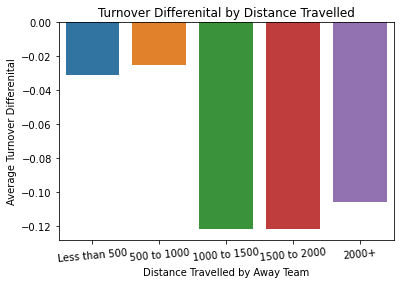

<Figure size 432x288 with 0 Axes>

In [8]:

#bar plot of turnover diff by distance
barplot3= sns.barplot(x = "Distance_Binned", y = "Turnover_Diff", data = df, ci = None)
barplot3.set(xlabel='Distance Travelled by Away Team', ylabel='Average Turnover Differenital', title= 'Turnover Differenital by Distance Travelled')
barplot3.set_xticklabels(barplot3.get_xticklabels(),rotation =5)
plt.show()
plt.clf()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


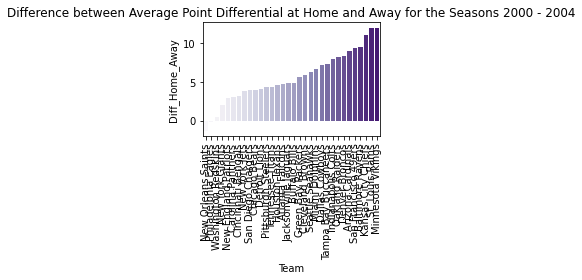

In [9]:
first5 = df[(df['Season'] <= 2004 ) & (df['Season'] >= 2000)]

second5 = df[(df['Season'] <= 2009 ) & (df['Season'] >= 2005)]

third5 = df[(df['Season'] <= 2014 ) & (df['Season'] >= 2010)]

final5 = df[(df['Season'] >= 2015)]

# Create a new column that calculates the point differential for Away Teams
first5['Points_Diff_Away'] = first5['Points_Away'] - first5['Points_Home']
points_cols = ['Points_Diff']
points_cols_away= ['Points_Diff_Away']
point_group = first5[points_cols].groupby(first5['Home_Team']).mean()
# Create a new column that's just the index of the df
point_group['Team'] = point_group.index
point_group_away = first5[points_cols_away].groupby(first5['Away_Team']).mean()
# Create a new column that's just the index of the df for the away teams
point_group_away['Team'] = point_group_away.index

# Merge the two groupby df(s)
merged_point_group = pd.merge(point_group, point_group_away)
# Rearrange the columns
merged_point_group = merged_point_group[["Team", "Points_Diff", "Points_Diff_Away"]]
# Calculate the difference in point differential at home vs. point differential away
merged_point_group['Diff_Home_Away'] = merged_point_group['Points_Diff'] - merged_point_group['Points_Diff_Away']
merged_point_group

# Plot a sorted bar plot for the difference in point differential at home vs. point differential away for each team
sns.barplot(x='Team', y="Diff_Home_Away",
            data=merged_point_group,
            palette="Purples",
            order=merged_point_group.sort_values('Diff_Home_Away').Team).set_title('Difference between Average Point Differential at Home and Away for the Seasons 2000 - 2004')
plt.xticks(rotation=90)
plt.tight_layout()
sns.set(rc = {'figure.figsize':(15,10)})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


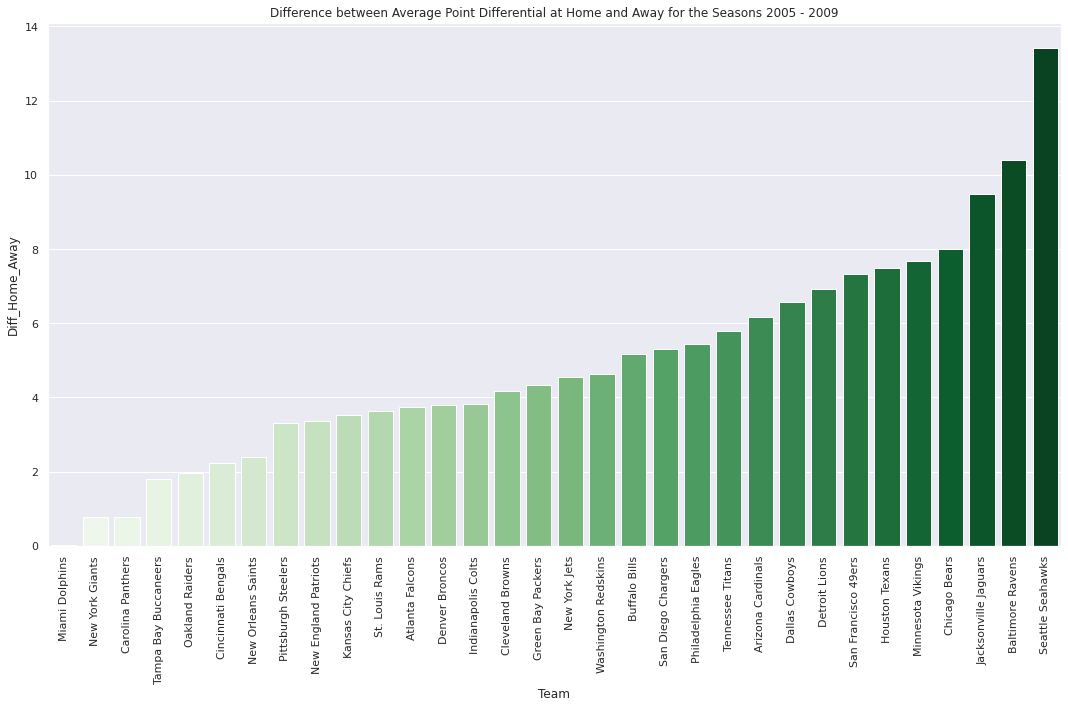

In [10]:

"""Do the same calculations for the rest of the season groupings"""

second5['Points_Diff_Away'] = second5['Points_Away'] - second5['Points_Home']
point_group_2nd = second5[points_cols].groupby(second5['Home_Team']).mean()
point_group_2nd['Team'] = point_group_2nd.index
point_group_away_2nd = second5[points_cols_away].groupby(second5['Away_Team']).mean()
point_group_away_2nd['Team'] = point_group_away_2nd.index

merged_point_group_2nd = pd.merge(point_group_2nd, point_group_away_2nd)
merged_point_group_2nd = merged_point_group_2nd[["Team", "Points_Diff", "Points_Diff_Away"]]
merged_point_group_2nd['Diff_Home_Away'] = merged_point_group_2nd['Points_Diff'] - merged_point_group_2nd['Points_Diff_Away']
merged_point_group_2nd
sns.barplot(x='Team', y="Diff_Home_Away",
            data=merged_point_group_2nd,
            palette="Greens",
            order=merged_point_group_2nd.sort_values('Diff_Home_Away').Team).set_title('Difference between Average Point Differential at Home and Away for the Seasons 2005 - 2009')
plt.xticks(rotation=90)
plt.tight_layout()
sns.set(rc = {'figure.figsize':(15,10)})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


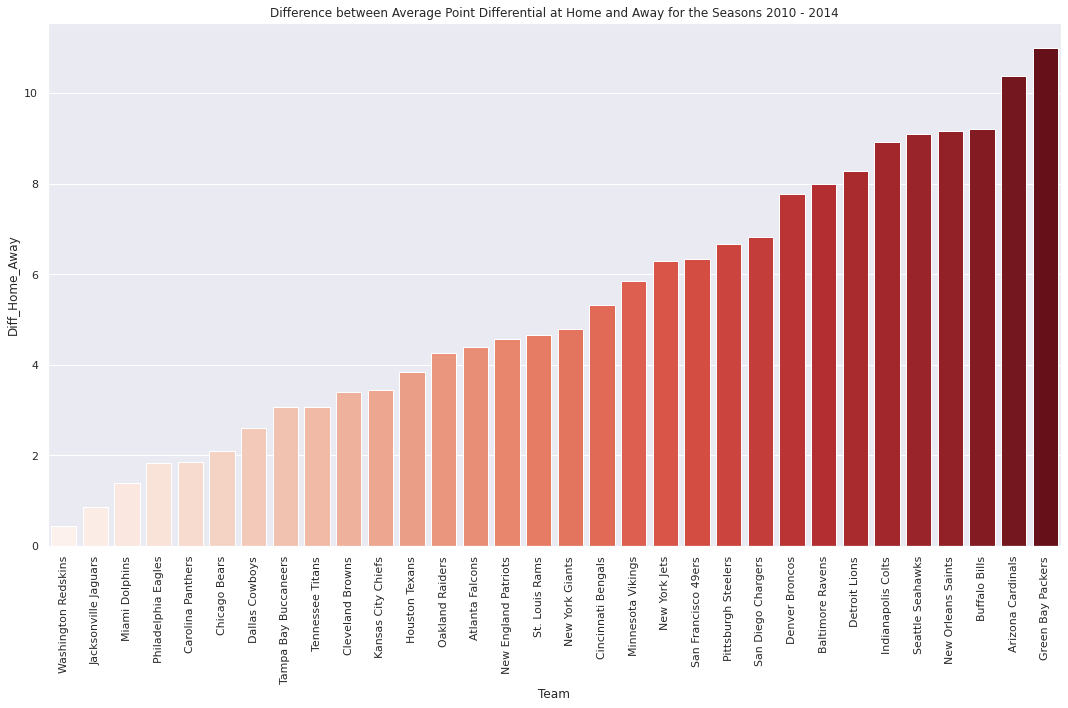

In [11]:

third5['Points_Diff_Away'] = third5['Points_Away'] - third5['Points_Home']
point_group_3rd = third5[points_cols].groupby(third5['Home_Team']).mean()
point_group_3rd['Team'] = point_group_3rd.index
point_group_away_3rd = third5[points_cols_away].groupby(third5['Away_Team']).mean()
point_group_away_3rd['Team'] = point_group_away_3rd.index

merged_point_group_3rd = pd.merge(point_group_3rd, point_group_away_3rd)
merged_point_group_3rd = merged_point_group_3rd[["Team", "Points_Diff", "Points_Diff_Away"]]
merged_point_group_3rd['Diff_Home_Away'] = merged_point_group_3rd['Points_Diff'] - merged_point_group_3rd['Points_Diff_Away']
merged_point_group_3rd
sns.barplot(x='Team', y="Diff_Home_Away",
            data=merged_point_group_3rd,
            palette="Reds",
            order=merged_point_group_3rd.sort_values('Diff_Home_Away').Team).set_title('Difference between Average Point Differential at Home and Away for the Seasons 2010 - 2014')
plt.xticks(rotation=90)
plt.tight_layout()
sns.set(rc = {'figure.figsize':(15,10)})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

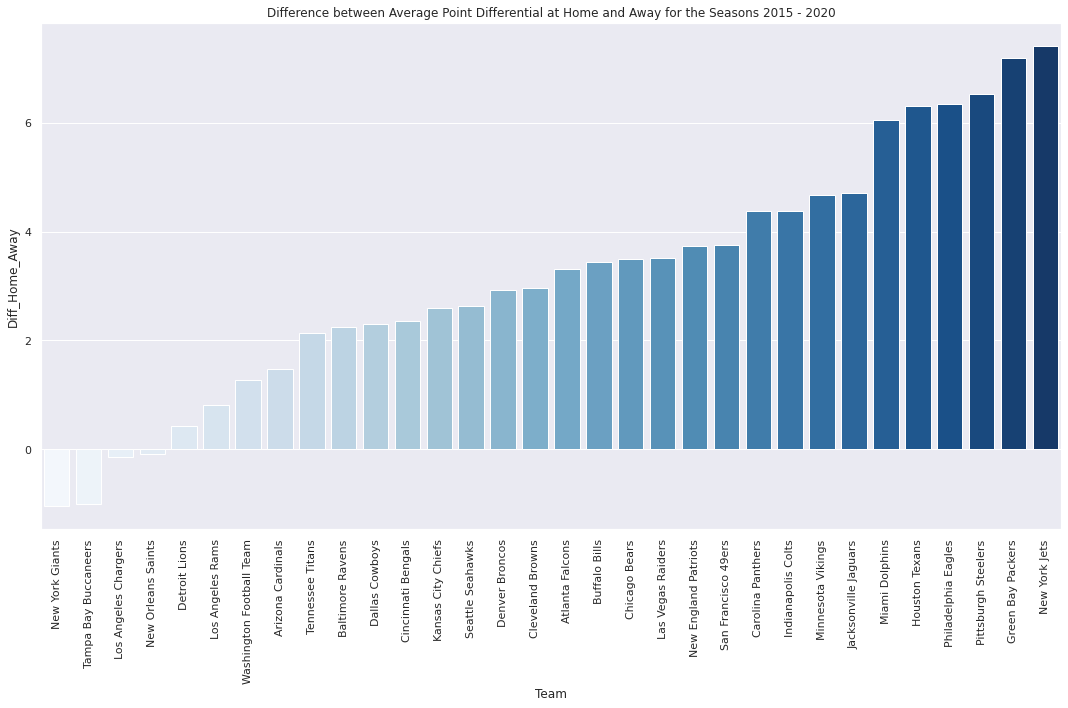

In [12]:

# Since the final season grouping is when there were name changes/city changes, merge them all into the current name so that two bars/groups aren't created for one franchise
final5.Home_Team[final5.Home_Team == "Washington Redskins"] = "Washington Football Team"
final5.Away_Team[final5.Away_Team == "Washington Redskins"] = "Washington Football Team"
final5.Home_Team[final5.Home_Team == "St. Louis Rams"] = "Los Angeles Rams"
final5.Away_Team[final5.Away_Team == "St. Louis Rams"] = "Los Angeles Rams"
final5.Home_Team[final5.Home_Team == "Oakland Raiders"] = "Las Vegas Raiders"
final5.Away_Team[final5.Away_Team == "Oakland Raiders"] = "Las Vegas Raiders"
final5.Home_Team[final5.Home_Team == "San Diego Chargers"] = "Los Angeles Chargers"
final5.Away_Team[final5.Away_Team == "San Diego Chargers"] = "Los Angeles Chargers"

final5['Points_Diff_Away'] = final5['Points_Away'] - final5['Points_Home']
point_group_4th = final5[points_cols].groupby(final5['Home_Team']).mean()
point_group_4th['Team'] = point_group_4th.index
point_group_away_4th = final5[points_cols_away].groupby(final5['Away_Team']).mean()
point_group_away_4th['Team'] = point_group_away_4th.index

merged_point_group_4th = pd.merge(point_group_4th, point_group_away_4th)
merged_point_group_4th = merged_point_group_4th[["Team", "Points_Diff", "Points_Diff_Away"]]
merged_point_group_4th['Diff_Home_Away'] = merged_point_group_4th['Points_Diff'] - merged_point_group_4th['Points_Diff_Away']
merged_point_group_4th
sns.barplot(x='Team', y="Diff_Home_Away",
            data=merged_point_group_4th,
            palette="Blues",
            order=merged_point_group_4th.sort_values('Diff_Home_Away').Team).set_title('Difference between Average Point Differential at Home and Away for the Seasons 2015 - 2020')
plt.xticks(rotation=90)
plt.tight_layout()
sns.set(rc = {'figure.figsize':(15,10)})


[(-2.0, 14.0),
 Text(0.5, 1.0, 'Difference between Average Point Differential at Home and Away for the Seasons 2015 - 2020')]

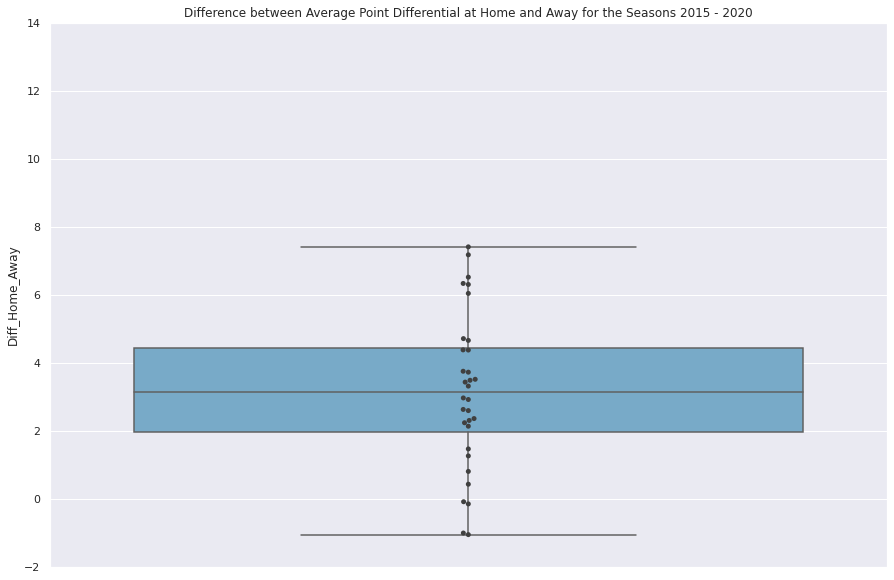

In [13]:

"""Create box plots to see the distribution of difference in point differential"""

sns.boxplot(y=merged_point_group_4th["Diff_Home_Away"], palette='Blues').set(ylim=(-2, 14),title='Difference between Average Point Differential at Home and Away for the Seasons 2015 - 2020')
sns.swarmplot(y=merged_point_group_4th["Diff_Home_Away"], color=".25").set(ylim=(-2, 14),title='Difference between Average Point Differential at Home and Away for the Seasons 2015 - 2020')


[(-2.0, 14.0),
 Text(0.5, 1.0, 'Difference between Average Point Differential at Home and Away for the Seasons 2010 - 2014')]

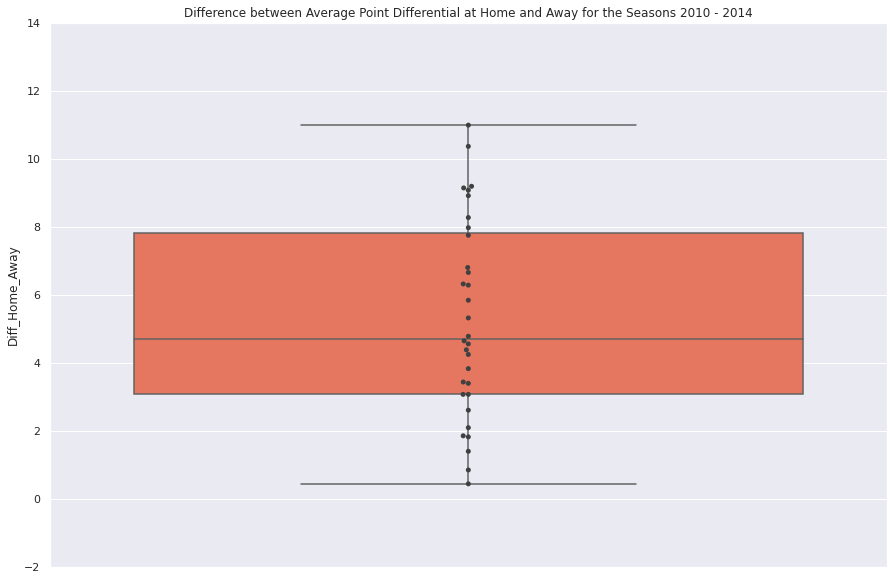

In [14]:

sns.boxplot(y=merged_point_group_3rd["Diff_Home_Away"], palette='Reds').set(ylim=(-2, 14),title='Difference between Average Point Differential at Home and Away for the Seasons 2010 - 2014')
sns.swarmplot(y=merged_point_group_3rd["Diff_Home_Away"], color=".25").set(ylim=(-2, 14),title='Difference between Average Point Differential at Home and Away for the Seasons 2010 - 2014')


[(-2.0, 14.0),
 Text(0.5, 1.0, 'Difference between Average Point Differential at Home and Away for the Seasons 2005 - 2009')]

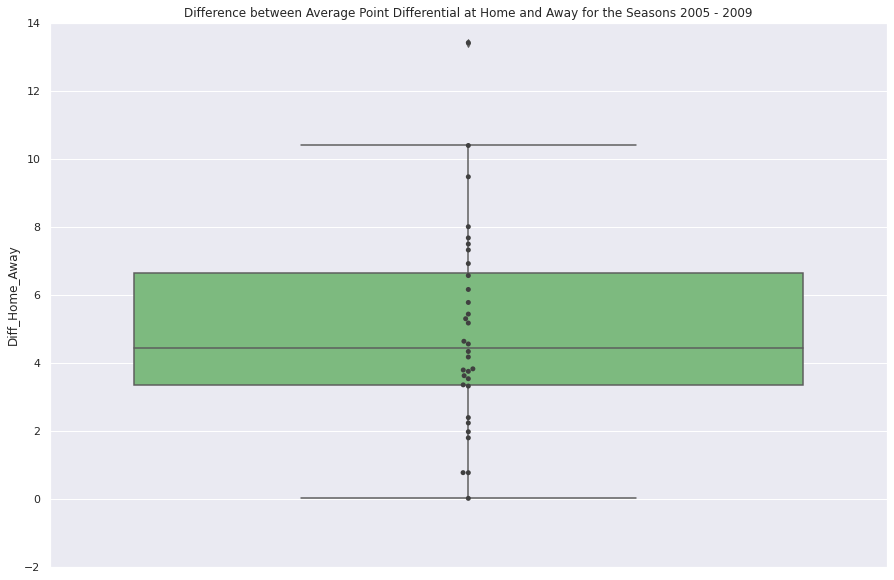

In [15]:

sns.boxplot(y=merged_point_group_2nd["Diff_Home_Away"], palette='Greens').set(ylim=(-2, 14),title='Difference between Average Point Differential at Home and Away for the Seasons 2005 - 2009')
sns.swarmplot(y=merged_point_group_2nd["Diff_Home_Away"], color=".25").set(ylim=(-2, 14),title='Difference between Average Point Differential at Home and Away for the Seasons 2005 - 2009')


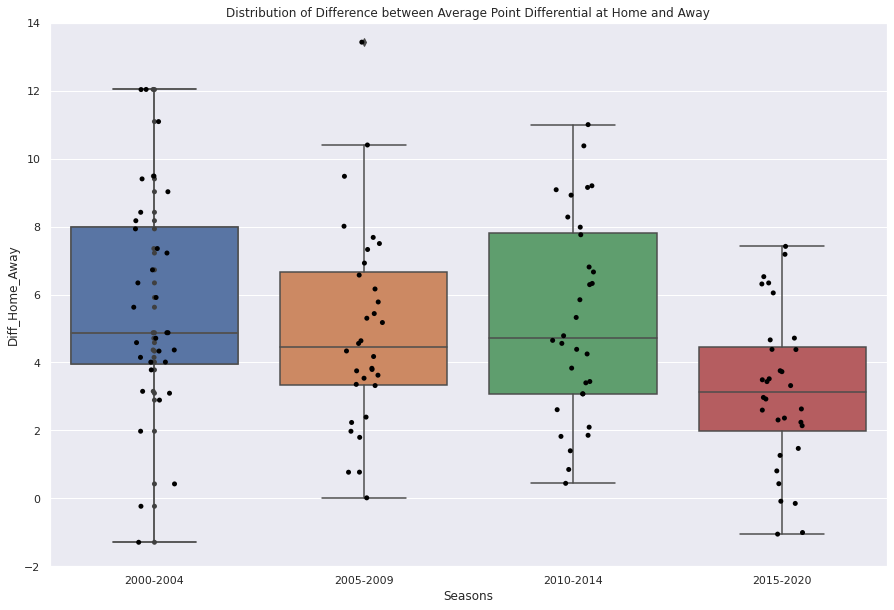

In [16]:

sns.boxplot(y=merged_point_group["Diff_Home_Away"], palette='Purples').set(ylim=(-2, 14), title='Difference between Average Point Differential at Home and Away for the Seasons 2000 - 2004')
sns.swarmplot(y=merged_point_group["Diff_Home_Away"], color=".25").set(ylim=(-2, 14), title='Difference between Average Point Differential at Home and Away for the Seasons 2000 - 2004')

# Create a column in each season grouping with the same name so they can be merged into one df
merged_point_group = merged_point_group.assign(Seasons="2000-2004")
merged_point_group_2nd = merged_point_group_2nd.assign(Seasons="2005-2009")
merged_point_group_3rd = merged_point_group_3rd.assign(Seasons="2010-2014")
merged_point_group_4th = merged_point_group_4th.assign(Seasons="2015-2020")

cdf = pd.concat([merged_point_group, merged_point_group_2nd, merged_point_group_3rd, merged_point_group_4th])
cdf  

# Create a box plot with 4 different boxes for each grouping of seasons 
sns.boxplot(x="Seasons", y="Diff_Home_Away", data=cdf)
sns.stripplot(x = "Seasons",
              y = "Diff_Home_Away",
              color = 'black',
              data = cdf).set_title("Distribution of Difference between Average Point Differential at Home and Away")    
plt.show()

**Further Data Visualization and Data Modeling in R**

For the next section of our project, we decided to use R to create more visualizations on the relationships between the variables as well as create models that'd help better explain the most impactful predictors of point differential. 

We created a data set that tracked the temperature, weather type, and wind of each game in the 2020 season to see what impact these conditions had on point differential. For further analysis, we'd pull the data for the other seasons of interest to determine if there are any long-term conclusions that can be made. 

In [17]:
%load_ext rpy2.ipython

In [18]:
%%R

library(readr)
library(dplyr)
library(stringr)
library(ggplot2)
urlfile <- "https://raw.githubusercontent.com/anath703/DS_5100_PROJECT/main/cleanedNflFullGameLog_withstadiuminfo.csv"
urlfile2 <- "https://raw.githubusercontent.com/anath703/DS_5100_PROJECT/main/data/NFL%20Weather.csv"

mydata <- read_csv(url(urlfile))  # Loading all NFL game data
mydata2 <- mydata %>% slice(5325:5580)  # Taking 2020 data only
mydata3 <- read.csv(url(urlfile2)) # Reading weather data

mydata2 <- mydata2 %>% mutate(TeamName = word(Home_Team,-1))
mydata2$TeamName[(mydata2$TeamName) == "Team"] <- "Washington"
mydata2 <- mydata2 %>% mutate(Key2 = paste(Week, TeamName))

mydata3 <- mydata3 %>% mutate(Key2 = paste(Week, Away))
mydata3 <- mydata3 %>% mutate(Temp = substr(Temperature, 1, 2))
mydata3 <- mydata3 %>% mutate(Wind2 = sub("m.*", "", mydata3$Wind))

mydata2$Key2 <- str_replace_all(mydata2$Key2, fixed(" "), "")
mydata3$Key2 <- str_replace_all(mydata3$Key2, fixed(" "), "")

mydata4 <- merge(mydata2, mydata3, by = "Key2")
mydata5 <- subset(mydata4, select=c("Points_Diff", "Conditions", "Temp", "Wind2"))
mydataF <- subset(mydata5, Temp!="DO")

mydataF$Temp <- as.numeric(mydataF$Temp)  # Making temperature numeric
mydataF$Wind2 <- as.numeric(mydataF$Wind2) # Making wind speed numeric
mydataF$Conditions <- as.factor(mydataF$Conditions) # Making conditions a factor so we can run regression


R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: New names:
* `` -> ...1



Rows: 5593 Columns: 30
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (8): Week, Day, Away_Team, Home_Team, Home_Stad_Type, Away_Stad_Type, ...
dbl  (19): ...1, Unnamed: 0, Season, Points_Home, Yards_Home, Turnover_Home,...
lgl   (1): Neutral
date  (1): Date
time  (1): Time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


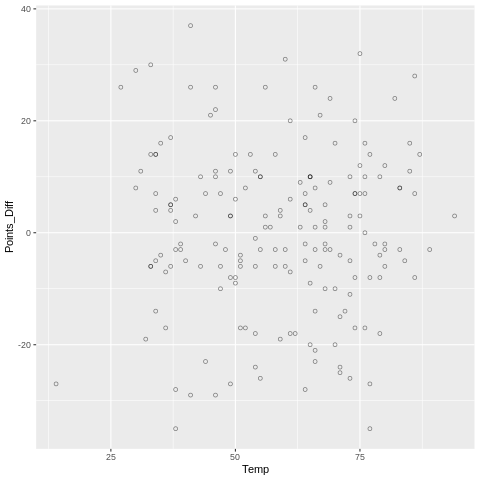

In [19]:
%%R

ggplot(mydataF, aes(x = Temp, y = Points_Diff))+
  geom_point(shape=21, alpha=0.5) # Visualization 1


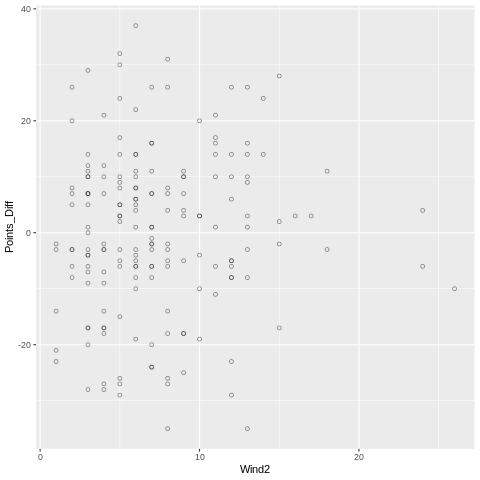

In [20]:
%%R
ggplot(mydataF, aes(x = Wind2, y = Points_Diff))+
  geom_point(shape=21, alpha=0.5) # Visualization 2


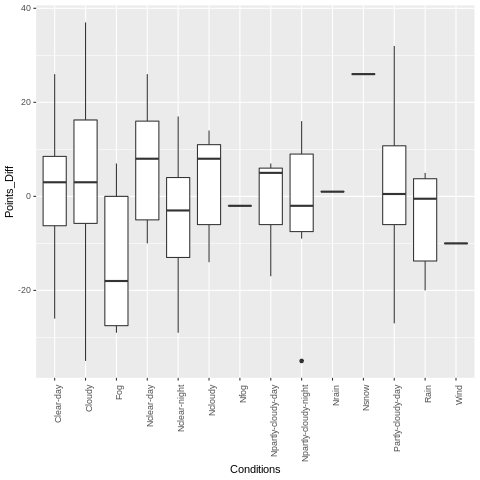

In [21]:
%%R
ggplot(mydataF, aes(x = Conditions, y = Points_Diff))+
  theme(axis.text.x=element_text(angle=90,hjust=1))+
  geom_boxplot()  # Visualization 3


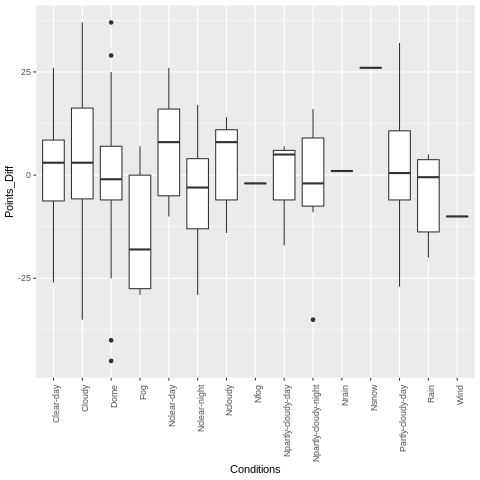

In [22]:
%%R
mydata4$Conditions <- as.factor(mydata4$Conditions)

ggplot(mydata4, aes(x = Conditions, y = Points_Diff))+
theme(axis.text.x=element_text(angle=90,hjust=1))+
  geom_boxplot()  # Visualization 4


In [23]:
%%R
Reg1 <- lm(Points_Diff ~ Temp + Wind2 + Conditions, data = mydataF) # Regression 
summary(Reg1)


Call:
lm(formula = Points_Diff ~ Temp + Wind2 + Conditions, data = mydataF)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.876  -8.848   0.465   9.107  33.856 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)  
(Intercept)                       0.74825    5.87303   0.127   0.8988  
Temp                             -0.03643    0.07885  -0.462   0.6447  
Wind2                             0.31132    0.27336   1.139   0.2564  
ConditionsCloudy                  2.02179    4.03660   0.501   0.6171  
ConditionsFog                   -14.63204    6.05023  -2.418   0.0167 *
ConditionsNclear-day              7.02460    6.84875   1.026   0.3065  
ConditionsNclear-night           -5.79214    4.46718  -1.297   0.1966  
ConditionsNcloudy                 1.92851    7.15757   0.269   0.7879  
ConditionsNfog                   -2.08603   14.66403  -0.142   0.8871  
ConditionsNpartly-cloudy-day     -1.75598    8.62457  -0.204   0.8389  
ConditionsNpartly-clou

We created models that analyzed the impact latitude, longitude, and altitude had on point-differential.

R[write to console]: New names:
* `` -> ...1



Rows: 5593 Columns: 30
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (8): Week, Day, Away_Team, Home_Team, Home_Stad_Type, Away_Stad_Type, ...
dbl  (19): ...1, Unnamed: 0, Season, Points_Home, Yards_Home, Turnover_Home,...
lgl   (1): Neutral
date  (1): Date
time  (1): Time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


R[write to console]: `geom_smooth()` using formula 'y ~ x'



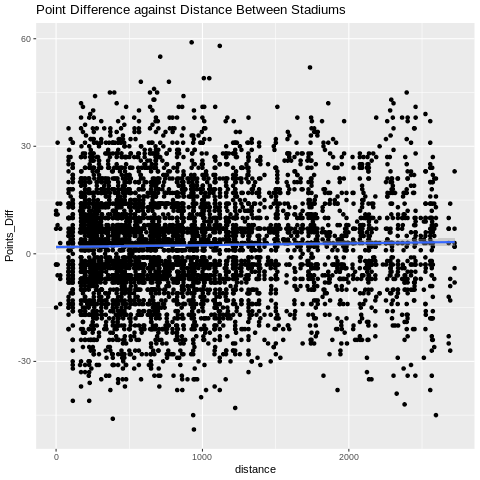

In [24]:
%%R

# Read in the csv data
data <- read_csv(url(urlfile))

# Plot of point difference between home and away based on difference
ggplot(data = data, aes(x = distance, y = Points_Diff)) + geom_point() +
  labs(title = "Point Difference against Distance Between Stadiums") +
  geom_smooth(method = "lm")


In [25]:
%%R
# Create a model with distance as a predictor
modDistance <- lm(data = data, Points_Diff~distance)
summary(modDistance)



Call:
lm(formula = Points_Diff ~ distance, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-51.368  -9.026   0.556   8.638  56.640 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.8829724  0.3478000   5.414 6.42e-08 ***
distance    0.0005152  0.0003007   1.713   0.0867 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.7 on 5591 degrees of freedom
Multiple R-squared:  0.0005246,	Adjusted R-squared:  0.0003459 
F-statistic: 2.935 on 1 and 5591 DF,  p-value: 0.08674



In [26]:
%%R
# Create a model with home longitude and away longitude as predictors
modLongitude <- lm(data = data, Points_Diff~Home_Longitude + Away_Longitude)
summary(modLongitude)



Call:
lm(formula = Points_Diff ~ Home_Longitude + Away_Longitude, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-50.905  -8.937   0.459   8.645  56.536 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.47452    1.57572  -0.301 0.763318    
Home_Longitude  0.01246    0.01335   0.933 0.350877    
Away_Longitude -0.04410    0.01335  -3.304 0.000959 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.69 on 5590 degrees of freedom
Multiple R-squared:  0.001982,	Adjusted R-squared:  0.001625 
F-statistic: 5.551 on 2 and 5590 DF,  p-value: 0.003906



In [27]:
%%R

# Create a model with home and away altitudes as predictors
modAltitude <- lm(data = data, Points_Diff~Home_Altitude + Away_Altitude)
summary(modAltitude)



Call:
lm(formula = Points_Diff ~ Home_Altitude + Away_Altitude, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-51.211  -9.231   0.633   8.659  56.696 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.2063950  0.2506984   8.801   <2e-16 ***
Home_Altitude 0.0002189  0.0002105   1.040    0.298    
Away_Altitude 0.0001094  0.0002129   0.514    0.607    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.7 on 5590 degrees of freedom
Multiple R-squared:  0.0002346,	Adjusted R-squared:  -0.0001231 
F-statistic: 0.656 on 2 and 5590 DF,  p-value: 0.519



In [28]:
%%R
# Convert stadium type to a factor
data$Home_Stad_Type<-factor(data$Home_Stad_Type)

# Model selection
modNull <- lm(data = data, Points_Diff~1)
modFull <- lm(data = data, Points_Diff~distance+Home_Stad_Type+Home_Altitude)
step(modNull, scope=list(lower=modNull, upper=modFull), direction="forward")
# forward selection includes distance but the AIC difference is almost nothing


Start:  AIC=30066.74
Points_Diff ~ 1

                 Df Sum of Sq     RSS   AIC
+ distance        1    633.91 1207628 30066
<none>                        1208262 30067
+ Home_Altitude   1    226.47 1208036 30068
+ Home_Stad_Type  2    484.69 1207778 30068

Step:  AIC=30065.8
Points_Diff ~ distance

                 Df Sum of Sq     RSS   AIC
<none>                        1207628 30066
+ Home_Altitude   1    244.06 1207384 30067
+ Home_Stad_Type  2    472.25 1207156 30068

Call:
lm(formula = Points_Diff ~ distance, data = data)

Coefficients:
(Intercept)     distance  
  1.8829724    0.0005152  



In [29]:
%%R
modNull <- lm(data = data, Points_Diff~1)
modFull <- lm(data = data, Points_Diff~distance+Home_Stad_Type+Home_Altitude)
step(modFull, scope=list(lower=modNull, upper=modFull), direction="backward")
# Backward selection chooses the same model including distance with similar AIC results.


Start:  AIC=30068.44
Points_Diff ~ distance + Home_Stad_Type + Home_Altitude

                 Df Sum of Sq     RSS   AIC
- Home_Stad_Type  2    482.45 1207384 30067
- Home_Altitude   1    254.27 1207156 30068
<none>                        1206902 30068
- distance        1    642.38 1207544 30069

Step:  AIC=30066.67
Points_Diff ~ distance + Home_Altitude

                Df Sum of Sq     RSS   AIC
- Home_Altitude  1    244.06 1207628 30066
<none>                       1207384 30067
- distance       1    651.51 1208036 30068

Step:  AIC=30065.8
Points_Diff ~ distance

           Df Sum of Sq     RSS   AIC
<none>                  1207628 30066
- distance  1    633.91 1208262 30067

Call:
lm(formula = Points_Diff ~ distance, data = data)

Coefficients:
(Intercept)     distance  
  1.8829724    0.0005152  



**User Input / Unit Testing**

We then created functions that took in user input and provided the homefield for that range. After, we created unit tests to ensure it worked correctly.

In [30]:
# This function can be called to prompt the user to provide a team and range of years, then return the given teams homefield advantage for that range.

def teamAdvantage():
   print(df['Home_Team'].unique()) # Provide list of teams for selection
   teamName = input("Enter the desired team from the list above:") # User selects team and years
   yearLower = int(input("Enter the starting year:"))
   yearUpper = int(input("Enter the ending year (If only one year is desired, enter the starting year again):"))
   dfWorking = df[(df['Season'] <= yearUpper ) & (df['Season'] >= yearLower)] # Set working year range
   mean_by_team_home = dfWorking.groupby('Home_Team').mean().reset_index() # Teams home performance
   mean_by_team_away = dfWorking.groupby('Away_Team').mean().reset_index() # Teams away performance
   points_at_home = mean_by_team_home[mean_by_team_home['Home_Team'] == "Arizona Cardinals"]["Points_Home"] # Calculating advantage
   points_at_away = mean_by_team_away[mean_by_team_away['Away_Team'] == "Arizona Cardinals"]["Points_Away"]
   team_point_diff = points_at_home - points_at_away
   if (yearUpper != yearLower):  
     return "The " + str(teamName) + " scored " +  str(float(team_point_diff)) + " more points at home than they scored while away between the years " + str(yearLower) + " and " + str(yearUpper)
   else:
     return "The " + str(teamName) + " scored " +  str(float(team_point_diff)) + " more points at home than they did while away in the year " + str(yearLower)



# Class for testing the previous functions calculations and variable storage
class advantageCalculator(object):
  def __init__(self, teamName, yearLower, yearUpper):

    self.teamName = teamName
    self.yearLower = yearLower
    self.yearUpper = yearUpper

  def teamAdvantageForTest(teamName, yearLower, yearUpper):
    #print(df['Home_Team'].unique())
    teamName = teamName
    yearLower = yearLower
    yearUpper = yearUpper
    dfWorking = df[(df['Season'] <= yearUpper ) & (df['Season'] >= yearLower)] 
    mean_by_team_home = dfWorking.groupby('Home_Team').mean().reset_index()
    mean_by_team_away = dfWorking.groupby('Away_Team').mean().reset_index()
    points_at_home = mean_by_team_home[mean_by_team_home['Home_Team'] == "Arizona Cardinals"]["Points_Home"]
    points_at_away = mean_by_team_away[mean_by_team_away['Away_Team'] == "Arizona Cardinals"]["Points_Away"]
    team_point_diff = points_at_home - points_at_away
    if (yearUpper != yearLower):  
      return float(team_point_diff)
    else:
      return float(team_point_diff)


In [31]:
import unittest
# Unittests for asserting that variables and calculations are being performed properly
class TestTeam(unittest.TestCase):

    def test_team(self):
      self.team = advantageCalculator('Arizona Cardinals', 2005, 2010) # Create an object for team and range
      self.assertEqual(self.team.teamName, 'Arizona Cardinals')  # Assure that name is being stored properly

class TestCalculatAdvValue(unittest.TestCase):
    def test_advantagFunc(self):
      self.teamFunc = advantageCalculator('Arizona Cardinals', 2005, 2010) # Object creation
      result = self.teamFunc.teamAdvantageForTest(2005, 2010) # calculate the homefield advantage
      self.assertEqual(result, 4.372549019607845)  # Assert calculation is performed correctly

unittest.main(argv=[''], exit = False)


..
----------------------------------------------------------------------
Ran 2 tests in 0.067s

OK
